In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances

global q
q = 0.03

def closer_neighbors(tree_array, array, k_number):
    closer_n = np.zeros((array.shape[0], k_number), dtype=(int, int))
    for i in range(array.shape[0]):
        closer_n[i] = tree_array.query(array.iloc[i], k=k_number)[1]
    return (closer_n)


def get_clusters(df, df_centroid, df_origin, k):
    for i in range(0, df.shape[0]):
        distance = []
        for j in range(0, k):
            distance.append(euclidean(df_origin.iloc[i], df_centroid[['X', 'Y']].iloc[j]))
        df['Cluster'].iloc[i] = np.argmin(distance)
    return df


def dunn_ind(df):
    # distance_centr = []
    # distance_centr.append(euclidean(df.groupby(['Cluster']).mean(), df.groupby(['Cluster']).mean()))
    distance_centr = euclidean_distances(df.groupby(['Cluster']).mean(), df.groupby(['Cluster']).mean())
    distance_array = df.groupby(['Cluster']).apply(lambda x: euclidean_distances(x, x))
    dist_max = []
    for i in range(len(distance_array)):
        dist_max.append(np.max(distance_array.iloc[i]))
    dunn_index = np.min(distance_centr[np.nonzero(distance_centr)]) / np.max(dist_max)
    return dunn_index


def kMeans(df, centroids, df_origin, dunn_index, alpha, k):
    df_1 = df.copy()
    previous_dunn_index = -100
    new_centroids = df_1.groupby(['Cluster']).mean()

    while (abs(dunn_index - previous_dunn_index) < alpha):
        previous_dunn_index = dunn_index
        centroids = new_centroids.copy()
        df_1 = get_clusters(df_1, centroids, df_origin, k)
        new_centroids = df_1.groupby(['Cluster']).mean()
        df_1['Clusters'] = get_clusters
        dunn_index = dunn_ind(df, centers)

    return (df, new_centroids, dunn_index)



df = pd.read_csv("/Users/alena_paliakova/Google Drive/!Bioinf_drive/02_MachinLearn/HW2/blobs.csv")

df['Cluster'] = 0
df_origin = df.copy
df_origin = df.drop(columns=['Cluster'])



Text(0.5, 1.0, 'Scatterplot - blobs')

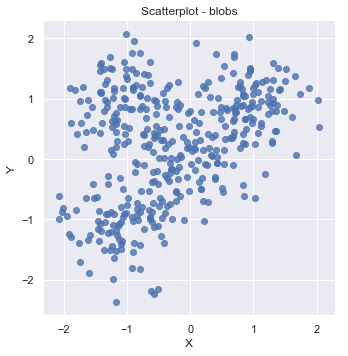

In [69]:
facet = sns.lmplot(data=df, x='X', y='Y', fit_reg=False, legend=False, legend_out=True)

ax = plt.gca()
ax.set_title('Scatterplot - blobs')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


k = 2 Dunn Index = 0.461749051988492


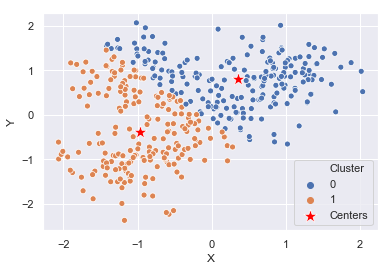

In [88]:
k = 2
q = 0.03
df_centroid = df.sample(n=k)
df = get_clusters(df, df_centroid, df_origin, k)
dunn = dunn_ind(df)

df = kMeans(df, df_centroid, df_origin, dunn, q, k)[0]
print('k =', k, 'Dunn Index =', kMeans(df, df_centroid, df_origin, dunn, q, k)[2])
centers = kMeans(df, df_centroid, df_origin, dunn, q, k)[1]

ax = sns.scatterplot(x='X', y='Y', data=df, hue="Cluster")
ax = sns.scatterplot(x='X', y='Y',data=centers, color='red', label='Centers', s=200, marker='*')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


k = 3 Dunn Index = 0.510081922317334


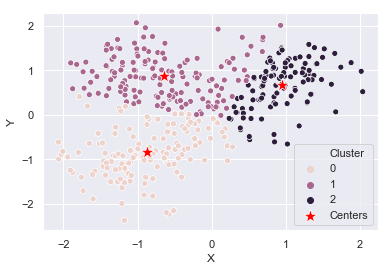

In [87]:
k = 3
q = 0.03
df_centroid = df.sample(n=k)
df = get_clusters(df, df_centroid, df_origin, k)
dunn = dunn_ind(df)

df = kMeans(df, df_centroid, df_origin, dunn, q, k)[0]
print('k =', k, 'Dunn Index =', kMeans(df, df_centroid, df_origin, dunn, q, k)[2])
centers = kMeans(df, df_centroid, df_origin, dunn, q, k)[1]

ax = sns.scatterplot(x='X', y='Y', data=df, hue="Cluster")
ax = sns.scatterplot(x='X', y='Y',data=centers, color='red', label='Centers', s=200, marker='*')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


k = 4 Dunn Index = 0.29595490118326834


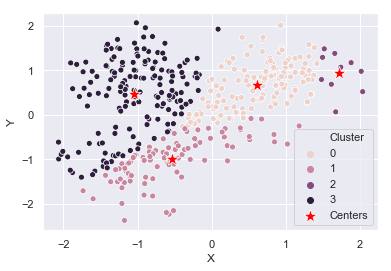

In [89]:
k = 4
q = 0.03
df_centroid = df.sample(n=k)
df = get_clusters(df, df_centroid, df_origin, k)
dunn = dunn_ind(df)

df = kMeans(df, df_centroid, df_origin, dunn, q, k)[0]
print('k =', k, 'Dunn Index =', kMeans(df, df_centroid, df_origin, dunn, q, k)[2])
centers = kMeans(df, df_centroid, df_origin, dunn, q, k)[1]

ax = sns.scatterplot(x='X', y='Y', data=df, hue="Cluster")
ax = sns.scatterplot(x='X', y='Y',data=centers, color='red', label='Centers', s=200, marker='*')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


k = 5 Dunn Index = 4.462552494454652e-09


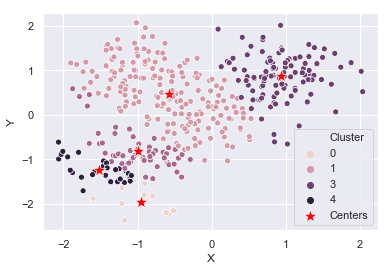

In [90]:
k = 5
q = 0.03
df_centroid = df.sample(n=k)
df = get_clusters(df, df_centroid, df_origin, k)
dunn = dunn_ind(df)

df = kMeans(df, df_centroid, df_origin, dunn, q, k)[0]
print('k =', k, 'Dunn Index =', kMeans(df, df_centroid, df_origin, dunn, q, k)[2])
centers = kMeans(df, df_centroid, df_origin, dunn, q, k)[1]

ax = sns.scatterplot(x='X', y='Y', data=df, hue="Cluster")
ax = sns.scatterplot(x='X', y='Y',data=centers, color='red', label='Centers', s=200, marker='*')